# Decision Tree on Salary dataset

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Salary.csv")

In [6]:
data.head(3)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731


In [8]:
data.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

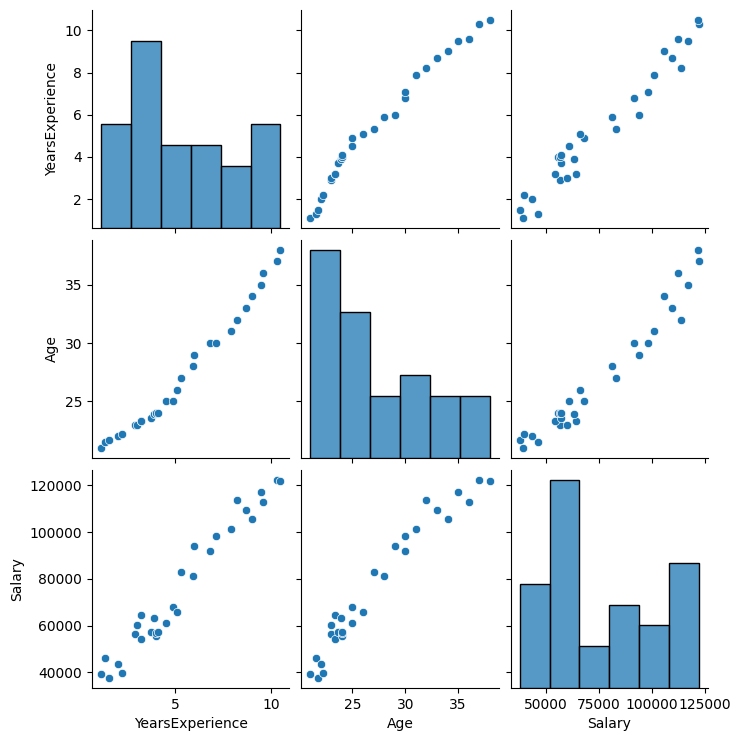

In [10]:
# to check what type of data look 
sns.pairplot(data=data)
plt.show()

In [11]:
# Its a linearity data that's why we are using Decision tree regression
X=data.iloc[:,:-1]
Y=data["YearsExperience"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [20]:
dt= DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [22]:
dt.score(X_test,Y_test)*100

99.3215809220332

In [24]:
#we are check the model is overfitted ?
dt.score(X_train,Y_train)*100   

100.0

#### Our model are not overfitted because the training accuracy and testing accuracy error gap is low 

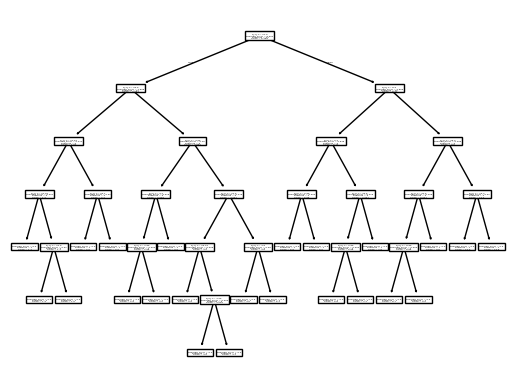

In [27]:
plot_tree(dt)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [38]:
# Hyper parameter
df={"criterion":["squared_error", "friedman_mse", "absolute_error","poisson"],
    "splitter":["best","random"],
    "max_depth":[i for i in range(2,20)]}

In [40]:
gd=GridSearchCV(DecisionTreeRegressor(),param_grid=df)
gd.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [42]:
gd.best_params_

{'criterion': 'squared_error', 'max_depth': 11, 'splitter': 'best'}

In [46]:
dt1=DecisionTreeRegressor(criterion='squared_error',max_depth=11,splitter='best')
dt1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=11)

In [48]:
dt1.score(X_train,Y_train)*100, dt1.score(X_test,Y_test)*100

(100.0, 99.3215809220332)

In [52]:
rd=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=df,n_iter=10)
rd.fit(X_train,Y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [54]:
rd.best_params_

{'splitter': 'best', 'max_depth': 15, 'criterion': 'absolute_error'}

In [56]:
rd.best_score_

np.float64(0.9731217315372414)